#Statistics Advance 2

 1.  What is hypothesis testing in statistics?

-> Hypothesis testing is a statistical procedure where sample data is used to test a claim (a hypothesis) about a population

2. What is the null hypothesis, and how does it differ from the alternative
hypothesis?

-> The null hypothesis (H₀) states that there is no significant effect, relationship, or difference between variables, while the alternative hypothesis (H₁ or Hₐ) proposes that a statistically significant effect, relationship, or difference does exist.

3.  Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.


-> The significance level (alpha, α) in hypothesis testing is the researcher-set probability of rejecting a true null hypothesis, also known as a Type I error.

4.  What are Type I and Type II errors? Give examples of each.


-> Type I and Type II errors are mistakes in hypothesis testing. A Type I error is a false positive (incorrectly rejecting a true null hypothesis), like concluding a drug is effective when it's not. A Type II error is a false negative (failing to reject a false null hypothesis), such as failing to identify a drug as effective when it actually is

5.  What is the difference between a Z-test and a T-test? Explain when to use
each.

-> The main difference is that a Z-test uses the population standard deviation (if known) or requires a large sample size for a normal distribution, while a T-test is used when the population standard deviation is unknown and the sample size is small. You use a Z-test for large samples where you have the population standard deviation, and a T-test for small samples where you estimate the standard deviation from the sample.

6. Write a Python program to generate a binomial distribution with n=10 and
p=0.5, then plot its histogram.
(Include your Python code and output in the code box below.)


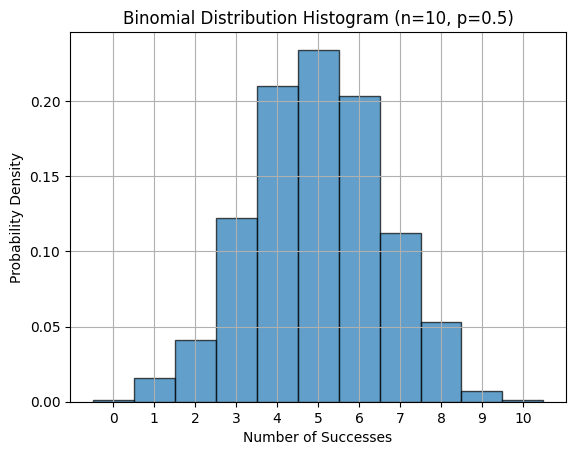

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5 # Probability of success in each trial
size = 1000 # Number of samples to generate

# Generate random samples from a binomial distribution
# The 'size' parameter determines how many times the 'n' trials are repeated
data = np.random.binomial(n=n, p=p, size=size)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(-0.5, n + 1.5, 1), density=True, edgecolor='black', alpha=0.7)

# Add labels and title for clarity
plt.title(f"Binomial Distribution Histogram (n={n}, p={p})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability Density")
plt.xticks(np.arange(0, n + 1, 1)) # Set x-axis ticks to show discrete values
plt.grid(True) # Add a grid for better readability

# Display the plot
plt.show()

7.  Implement hypothesis testing using Z-statistics for a sample dataset in
Python. Show the Python code and interpret the results.
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]


In [4]:
import numpy as np
from scipy import stats

# Sample data
sample_data = np.array( [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9])

# Hypothesized population mean (μ0)
population_mean_hypothesized = 65

# Population standard deviation (σ) - assumed known for Z-test
population_std_dev = 3

# Significance level (alpha)
alpha = 0.05

# Calculate sample mean and sample size
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Calculate the Z-statistic
# Z = (sample_mean - population_mean_hypothesized) / (population_std_dev / sqrt(sample_size))
z_statistic = (sample_mean - population_mean_hypothesized) / (population_std_dev / np.sqrt(sample_size))

# Calculate the p-value for a two-tailed test
# For a two-tailed test, we are interested in extreme values on both sides of the distribution.
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Z-Statistic: {z_statistic:.2f}")
print(f"P-Value: {p_value:.3f}")

# Make a decision
if p_value < alpha:
    print(f"Since p-value ({p_value:.3f}) < alpha ({alpha}), reject the null hypothesis.")
    print("There is significant evidence to suggest the sample mean is different from the hypothesized population mean.")
else:
    print(f"Since p-value ({p_value:.3f}) >= alpha ({alpha}), fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest the sample mean is different from the hypothesized population mean.")

Sample Mean: 50.09
Z-Statistic: -29.82
P-Value: 0.000
Since p-value (0.000) < alpha (0.05), reject the null hypothesis.
There is significant evidence to suggest the sample mean is different from the hypothesized population mean.


8. : Write a Python script to simulate data from a normal distribution and
calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


Simulated Data Mean: 48.96
95% Confidence Interval for the Mean: (47.16, 50.76)


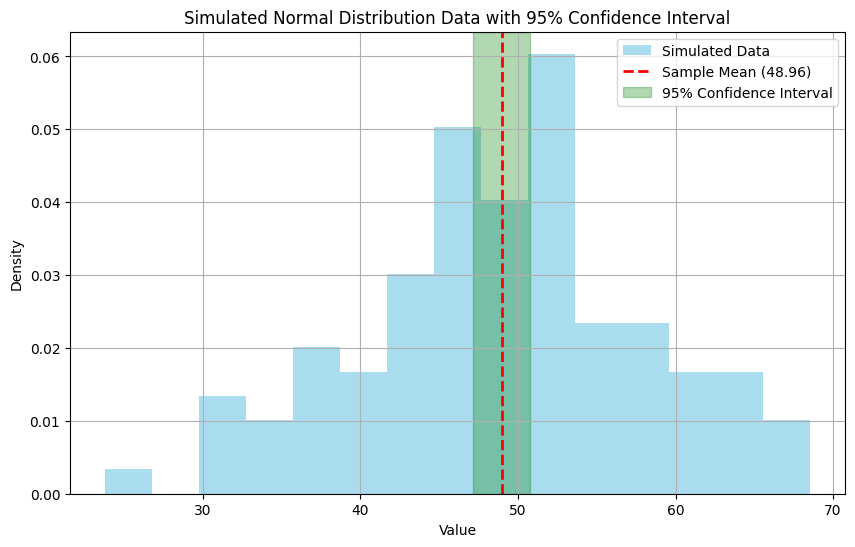

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Simulate data from a normal distribution
np.random.seed(42)  # for reproducibility
mean_true = 50
std_dev_true = 10
sample_size = 100

data = np.random.normal(mean_true, std_dev_true, sample_size)

# 2. Calculate the 95% confidence interval for the mean
sample_mean = np.mean(data)
sample_std_error = stats.sem(data)  # Standard Error of the Mean

# For a 95% confidence interval, the alpha level is 0.05.
# For a two-tailed test, we need the t-score corresponding to 0.975 (1 - alpha/2)
# and degrees of freedom (n-1).
confidence_level = 0.95
degrees_freedom = sample_size - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

margin_of_error = t_critical * sample_std_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Simulated Data Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval for the Mean: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# 3. Plot the data and confidence interval using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, density=True, alpha=0.7, color='skyblue', label='Simulated Data')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Sample Mean ({sample_mean:.2f})')
plt.axvspan(confidence_interval[0], confidence_interval[1], color='green', alpha=0.3, label='95% Confidence Interval')

plt.title('Simulated Normal Distribution Data with 95% Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

9. : Write a Python function to calculate the Z-scores from a dataset and
visualize the standardized data using a histogram. Explain what the Z-scores represent
in terms of standard deviations from the mean

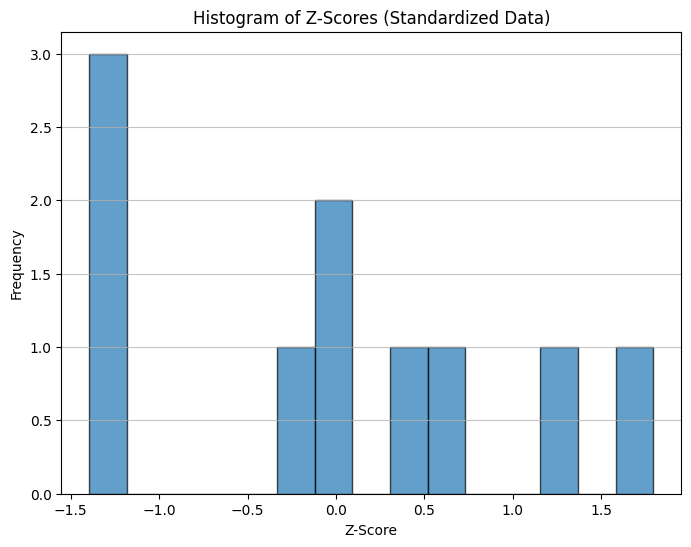


Descriptive Statistics of Z-Scores:
Mean of Z-scores: 0.0000
Standard Deviation of Z-scores: 1.0000

Calculated Z-scores: [-1.39443338 -1.19522861 -1.19522861 -0.19920477  0.          0.
  0.39840954  0.5976143   1.19522861  1.79284291]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def analyze_data_with_zscores(data):
    """
    Calculates Z-scores for a given dataset, visualizes the standardized data
    using a histogram, and prints descriptive statistics.

    Args:
        data (list or np.array): The input dataset.
    """
    data = np.array(data) # Ensure data is a NumPy array

    # Calculate Z-scores
    z_scores = zscore(data)

    # Visualize the standardized data using a histogram
    plt.figure(figsize=(8, 6))
    plt.hist(z_scores, bins=15, edgecolor='black', alpha=0.7)
    plt.title('Histogram of Z-Scores (Standardized Data)')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Print descriptive statistics of Z-scores
    print("\nDescriptive Statistics of Z-Scores:")
    print(f"Mean of Z-scores: {np.mean(z_scores):.4f}")
    print(f"Standard Deviation of Z-scores: {np.std(z_scores):.4f}")

    return z_scores

# Example usage:
dataset = [6, 7, 7, 12, 13, 13, 15, 16, 19, 22]
calculated_z_scores = analyze_data_with_zscores(dataset)
print("\nCalculated Z-scores:", calculated_z_scores)